In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [3]:
NUM_CLASSES = 25

# 学習データ読み込み

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 25)                275       
                                                                 
Total params: 1,345
Trainable params: 1,345
Non-trainable params: 0
_________________________________________________________________


In [9]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/10 [==>...........................] - ETA: 28s - loss: 3.2984 - accuracy: 0.0078
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 4s 117ms/step - loss: 3.2801 - accuracy: 0.0321 - val_loss: 3.2345 - val_accuracy: 0.0182
Epoch 2/1000
 1/10 [==>...........................] - ETA: 0s - loss: 3.2323 - accuracy: 0.0078
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 23ms/step - loss: 3.2347 - accuracy: 0.0416 - val_loss: 3.2203 - val_accuracy: 0.0364
Epoch 3/1000
 1/10 [==>...........................] - ETA: 0s - loss: 3.2514 - accuracy: 0.0156
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
10/10 [==============================] - 0s 18ms/step - loss: 3.2316 - accuracy: 0.0286 - val_loss: 3.2062 - val_accuracy: 0.0286
Epoch 4/1000
 1/10 [==>...........................] - ETA: 0s - loss: 3.2150 - accuracy: 0.0

In [12]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

4/4 [==============================] - 0s 6ms/step - loss: 1.1753 - accuracy: 0.6571


In [13]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [14]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 269ms/step
[5.7166439e-02 4.0236601e-04 1.0002056e-03 1.8845167e-05 3.9564777e-02
 1.0621207e-04 2.3530424e-06 3.1386077e-07 2.1543296e-01 4.6360164e-08
 2.2030035e-04 2.4609057e-05 4.2695429e-02 3.4058914e-02 2.8666077e-04
 3.4159351e-05 3.0348474e-11 4.2147412e-06 7.2475031e-02 2.8936688e-02
 1.1634082e-08 7.0178494e-08 2.2687016e-07 1.5367099e-06 5.0756770e-01]
24


# 混同行列

13/13 [==============================] - 0s 3ms/step


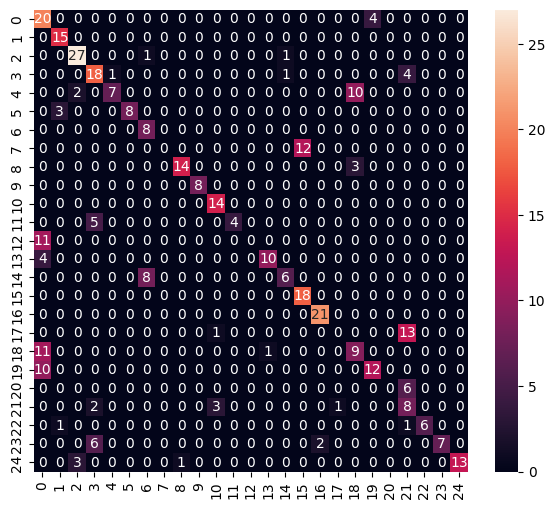

Classification Report
              precision    recall  f1-score   support

           0       0.36      0.83      0.50        24
           1       0.79      1.00      0.88        15
           2       0.84      0.93      0.89        29
           3       0.58      0.75      0.65        24
           4       0.88      0.37      0.52        19
           5       1.00      0.73      0.84        11
           6       0.47      1.00      0.64         8
           7       0.00      0.00      0.00        12
           8       0.93      0.82      0.87        17
           9       1.00      1.00      1.00         8
          10       0.78      1.00      0.88        14
          11       1.00      0.44      0.62         9
          12       0.00      0.00      0.00        11
          13       0.91      0.71      0.80        14
          14       0.75      0.43      0.55        14
          15       0.60      1.00      0.75        18
          16       0.91      1.00      0.95        21
     

C:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Program Files\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [16]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [17]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\Cathy\AppData\Local\Temp\tmparkhwef4\assets


INFO:tensorflow:Assets written to: C:\Users\Cathy\AppData\Local\Temp\tmparkhwef4\assets


7468

# 推論テスト

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[5.71664162e-02 4.02366044e-04 1.00020575e-03 1.88451668e-05
 3.95647809e-02 1.06212065e-04 2.35304242e-06 3.13860511e-07
 2.15432823e-01 4.63601673e-08 2.20300368e-04 2.46090585e-05
 4.26954478e-02 3.40589248e-02 2.86660768e-04 3.41593186e-05
 3.03484772e-11 4.21474124e-06 7.24750459e-02 2.89366841e-02
 1.16341061e-08 7.01785581e-08 2.26870171e-07 1.53670851e-06
 5.07567763e-01]
24
